In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ecofunction import macd, ema, signal

## Importing data

In [2]:
intel_value = pd.read_csv("intc_us_d.csv")

intel_value = intel_value.iloc[:1000]
# intel_value = intel_value[::-1]
intel_value['Srednia'] = (intel_value['Otwarcie'] + intel_value['Zamkniecie'])/2

intel_value.iloc[:10]

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Srednia
0,2018-01-02,40.3697,40.8229,40.2231,40.7781,2.639922e+07,40.57390
1,2018-01-03,39.5794,40.2231,37.9942,39.3948,1.329136e+08,39.48710
2,2018-01-04,37.8808,38.8635,37.1589,38.6750,1.024465e+08,38.27790
3,2018-01-05,38.6750,39.3001,38.2129,38.9074,4.799999e+07,38.79120
4,2018-01-08,38.5352,39.0276,38.2627,38.9425,3.872708e+07,38.73885
5,2018-01-09,38.9074,39.0276,37.8544,37.9677,5.084294e+07,38.43755
6,2018-01-10,37.7167,37.9501,36.9391,36.9929,5.253039e+07,37.35480
7,2018-01-11,37.2527,37.9336,36.9480,37.7851,4.058237e+07,37.51890
8,2018-01-12,37.8192,37.9501,37.4364,37.6366,3.439174e+07,37.72790
9,2018-01-16,37.9062,38.1152,37.3289,37.5497,4.354925e+07,37.72795


In [3]:
SIZE_OF_CHART=1000
START_OF_CHART=50 
RANGE_OF_CHART = SIZE_OF_CHART - START_OF_CHART

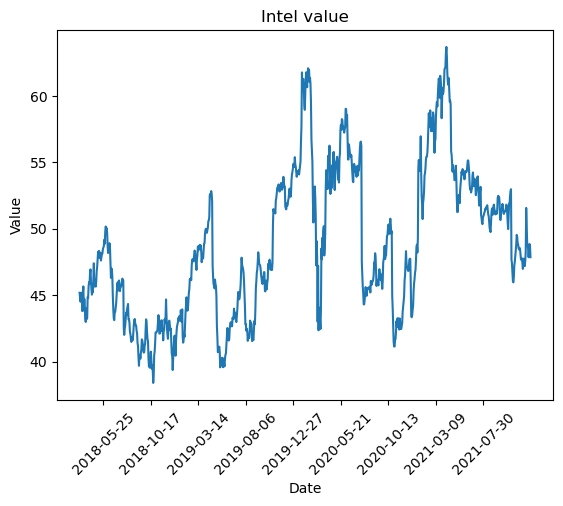

<Figure size 640x480 with 0 Axes>

In [145]:
values = intel_value.iloc[START_OF_CHART:SIZE_OF_CHART]
x = values['Data']
y = values['Srednia']
plt.plot(x,y)
xticks_date = [x.iloc[i] for i in range(START_OF_CHART, RANGE_OF_CHART, 100)]
plt.xticks(xticks_date, rotation=45)
plt.title("Intel value")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()
plt.clf()

## Testing

In [80]:
print(macd(intel_value[-30:0:-1]))

-0.8762875088774251


In [78]:
ema12 = ema(intel_value['Srednia'], 12)
ema26 = ema(intel_value['Srednia'], 26)
print(ema12)
print(ema26)
macd_value = ema12-ema26
print(macd_value)

38.841191495064386
39.20951504708671
-0.3683235520223249


In [7]:
signal_val = signal(intel_value)
print(signal_val)

-0.675131500263556


In [8]:
print(macd(intel_value))

-0.3683235520223249


In [124]:
macd(intel_value.iloc[537:487:-1])

0.6153567899840127

## Collecting data to plot

In [4]:
x = np.arange(0,RANGE_OF_CHART)

In [5]:

y1 = np.zeros(RANGE_OF_CHART)
for i in range(START_OF_CHART, SIZE_OF_CHART):
    y1[i-50] = macd(intel_value.iloc[i:i-50:-1])

In [6]:
y2 = np.zeros(RANGE_OF_CHART)
for i in range(START_OF_CHART, SIZE_OF_CHART):
    y2[i-50] = signal(intel_value.iloc[i:i-50:-1])

In [7]:
values = intel_value.iloc[START_OF_CHART:SIZE_OF_CHART]
y3 = np.zeros(RANGE_OF_CHART)
for i in range(RANGE_OF_CHART):
    y3[i] = values['Srednia'].iloc[0]
    values = values.iloc[1:]

## Create a plot

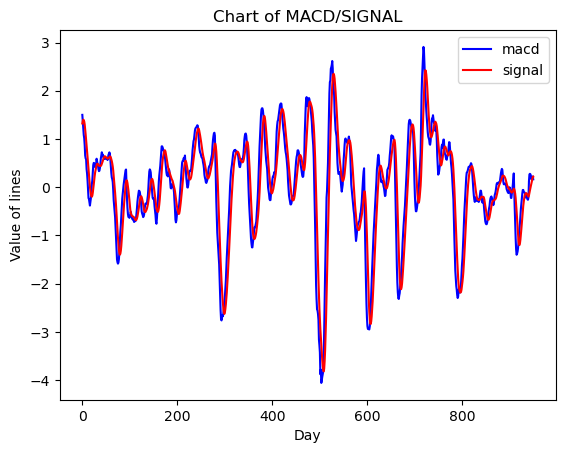

In [8]:
plt.plot(x,y1, 'b', label="macd")
plt.plot(x,y2, 'r', label="signal")
plt.legend()
plt.title("Chart of MACD/SIGNAL")
plt.xlabel("Day")
plt.ylabel("Value of lines")
plt.show()

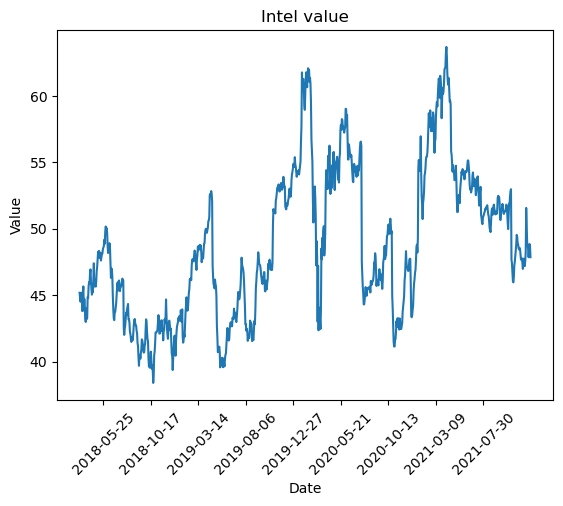

<Figure size 640x480 with 0 Axes>

In [16]:
values = intel_value.iloc[START_OF_CHART:SIZE_OF_CHART]
x = values['Data']
y = values['Srednia']
plt.plot(x,y)
xticks_date = [x.iloc[i] for i in range(START_OF_CHART, RANGE_OF_CHART, 100)]
plt.xticks(xticks_date, rotation=45)
plt.title("Intel value")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()
plt.clf()